# RAG Model using LlamaIndex

### Pipeline to follow (In high level)

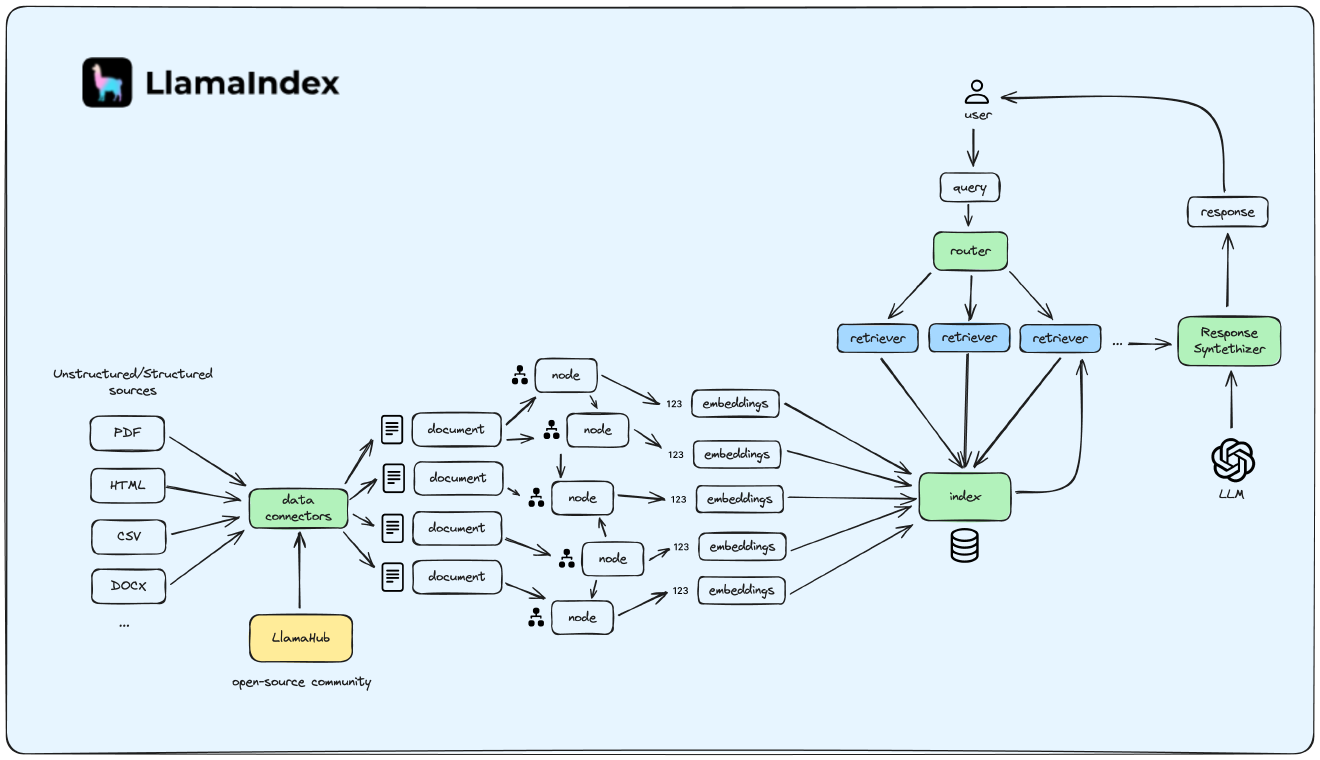

##### Source -> https://alejandro-ao.com/intro-to-llamaindex/

## Load the api key

In [1]:
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass(prompt="Enter your OpenAI API key: ")

## Create RAG Model

##### Persistent storage

You can persist the index to disk so that you can load it later without having to re-index your documents. VectorStoreIndex has a persist method that allows you to save the index to disk. You can then load the index from disk using the load_index_from_storage function. Here is an example:

In [3]:
import os.path
from llama_index.core import (
    VectorStoreIndex,
    SimpleDirectoryReader,
    StorageContext,
    load_index_from_storage,
)

# check if storage already exists
PERSIST_DIR = "./storage"

if not os.path.exists(PERSIST_DIR):
    # load the documents and create the index
    documents = SimpleDirectoryReader("data").load_data()
    index = VectorStoreIndex.from_documents(documents)
    # store it for later
    index.storage_context.persist(persist_dir=PERSIST_DIR)
else:
    # load the existing index
    storage_context = StorageContext.from_defaults(persist_dir=PERSIST_DIR)
    index = load_index_from_storage(storage_context)

##### Create a simple interface to interact with the RAG

In [4]:
import gradio as gr

# Crear el motor de consulta
query_engine = index.as_query_engine()


# Definir la función de consulta
def consulta_rag(pregunta):
    response = query_engine.query(pregunta)
    return response.response

# Crear la interfaz de Gradio
iface = gr.Interface(
    fn=consulta_rag,
    inputs="text",
    outputs="text",
    title="Consultas a RAG",
    description="Introduce una pregunta para consultar el índice.",
)

## Use the RAG System

In [6]:
if __name__ == "__main__":
    iface.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
